### Training and Visualizing Decision Tree


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [2]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
export_graphviz(
    tree_clf,
    out_file='tree.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

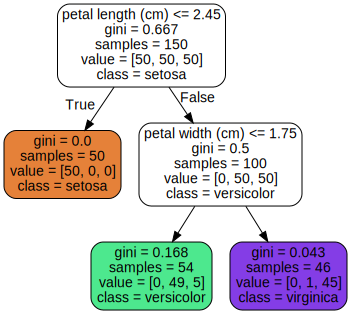

In [4]:
from graphviz import Source

Source.from_file('tree.dot')

let's do over fitting


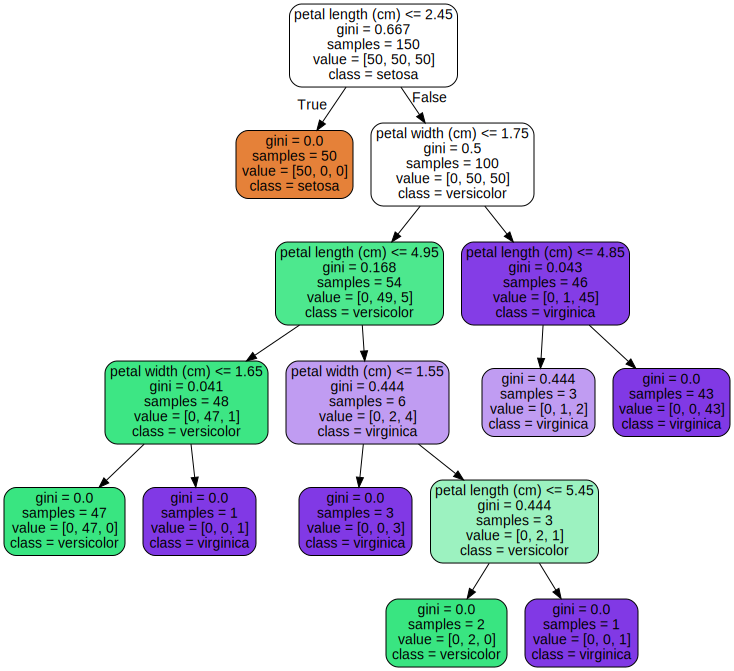

In [5]:
tree_clf2 = DecisionTreeClassifier(max_depth=None, random_state=32)
tree_clf2.fit(X, y)

export_graphviz(
    tree_clf2,
    out_file='treePure.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file('treePure.dot')

In [6]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [7]:
tree_clf.tree_

In [8]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [9]:
tree_clf2.predict_proba([[5, 1.5]]).round(3)

array([[0., 0., 1.]])

In [10]:
tree_clf.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [11]:
tree_clf2.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005,  1.65000004,
       -2.        , -2.        ,  1.55000001, -2.        ,  5.45000005,
       -2.        , -2.        ,  4.85000014, -2.        , -2.        ])

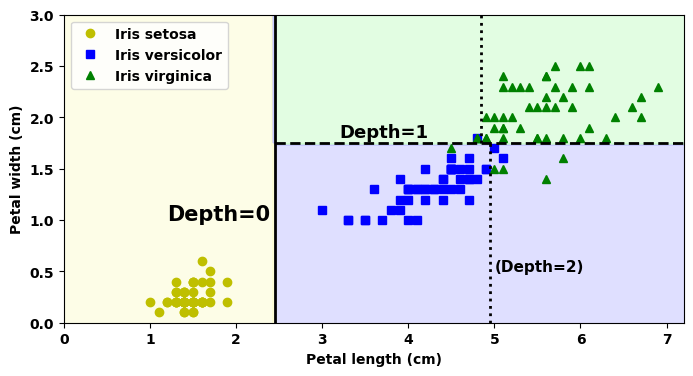

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

### Regularization Hyperparameter


In [26]:
from sklearn.datasets import make_moons

X, y = make_moons(150, noise=.2, random_state=42)
tree1 = DecisionTreeClassifier(random_state=42)
tree2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree1.fit(X, y)
tree2.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

creating test data


In [27]:
X_test, y_test = make_moons(1000, noise=.2, random_state=43)

In [28]:
tree1.score(X_test, y_test)

0.898

In [29]:
tree2.score(X_test, y_test)

0.92

notice that regularized tree has better performance


> Note: increasing min*\* hyperparameter and reducing max*\* hyperparameter gives regularization to decision tree.


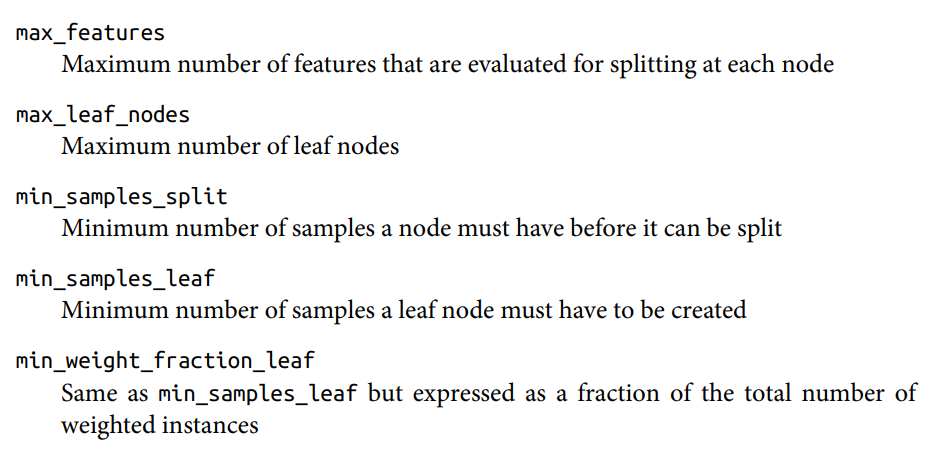


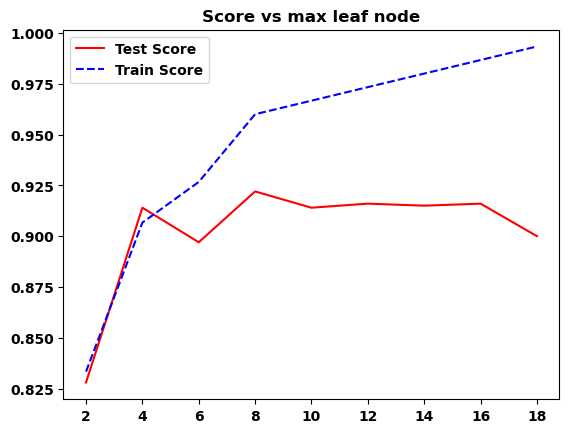

In [58]:
train_scores, scores, nn = [], [], 20
for n in range(2, nn, 2):
    tree3 = DecisionTreeClassifier(max_leaf_nodes=n, random_state=32)
    tree3.fit(X, y)
    scores.append(tree3.score(X_test, y_test))
    train_scores.append(tree3.score(X, y))

plt.plot(range(2, nn, 2), scores, 'r-', label='Test Score')
plt.plot(range(2, nn, 2), train_scores, 'b--', label='Train Score')
plt.legend()
plt.title('Score vs max leaf node')
plt.show()

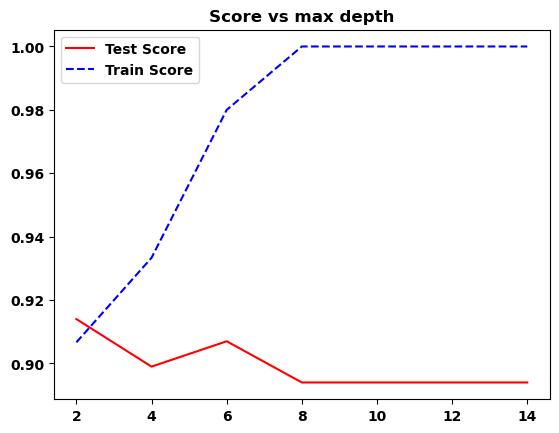

In [54]:
train_scores, scores, nn = [], [], 16
for n in range(2, nn, 2):
    tree3 = DecisionTreeClassifier(max_depth=n, random_state=32)
    tree3.fit(X, y)
    scores.append(tree3.score(X_test, y_test))
    train_scores.append(tree3.score(X, y))

plt.plot(range(2, nn, 2), scores, 'r-', label='Test Score')
plt.plot(range(2, nn, 2), train_scores, 'b--', label='Train Score')
plt.legend()
plt.title('Score vs max depth')
plt.show()

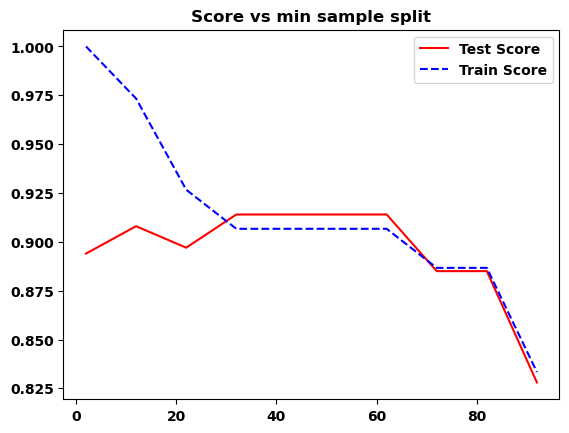

In [63]:
train_scores, scores, nn = [], [], 100
for n in range(2, nn, 10):
    tree3 = DecisionTreeClassifier(min_samples_split=n, random_state=32)
    tree3.fit(X, y)
    scores.append(tree3.score(X_test, y_test))
    train_scores.append(tree3.score(X, y))

plt.plot(range(2, nn, 10), scores, 'r-', label='Test Score')
plt.plot(range(2, nn, 10), train_scores, 'b--', label='Train Score')
plt.legend()
plt.title('Score vs min sample split')
plt.show()

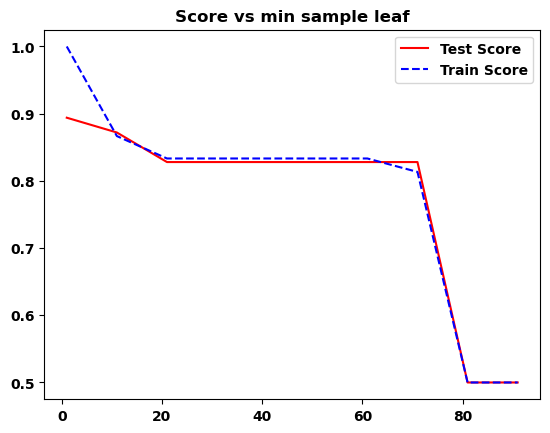

In [68]:
train_scores, scores, nn = [], [], 100
for n in range(1, nn, 10):
    tree3 = DecisionTreeClassifier(min_samples_leaf=n, random_state=32)
    tree3.fit(X, y)
    scores.append(tree3.score(X_test, y_test))
    train_scores.append(tree3.score(X, y))

plt.plot(range(1, nn, 10), scores, 'r-', label='Test Score')
plt.plot(range(1, nn, 10), train_scores, 'b--', label='Train Score')
plt.legend()
plt.title('Score vs min sample leaf')
plt.show()

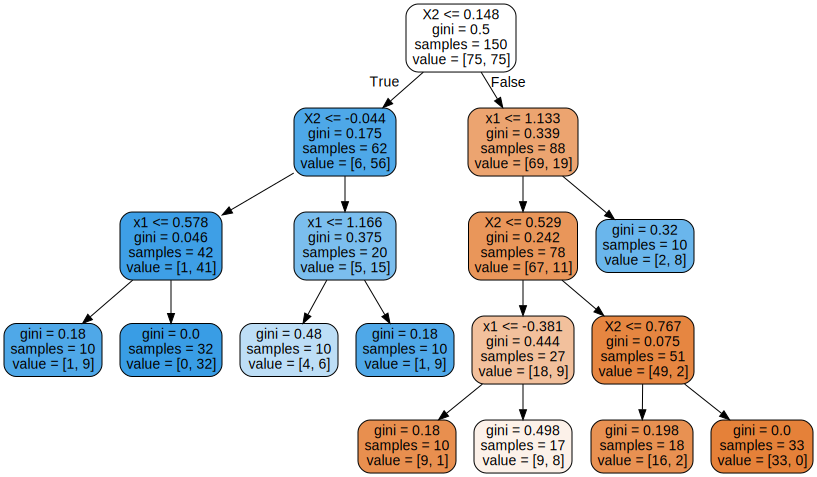

In [71]:
tree = DecisionTreeClassifier(
    min_samples_leaf=10, min_samples_split=20, random_state=32)
tree.fit(X, y)
export_graphviz(
    tree,
    out_file='tree3Regularized.dot',
    feature_names=["x1", 'X2'],
    rounded=True,
    filled=True
)
Source.from_file('tree3Regularized.dot')

We can see that min sample leaf is applied, and min sample split also applied, let's see the same model without using hyperparameter...


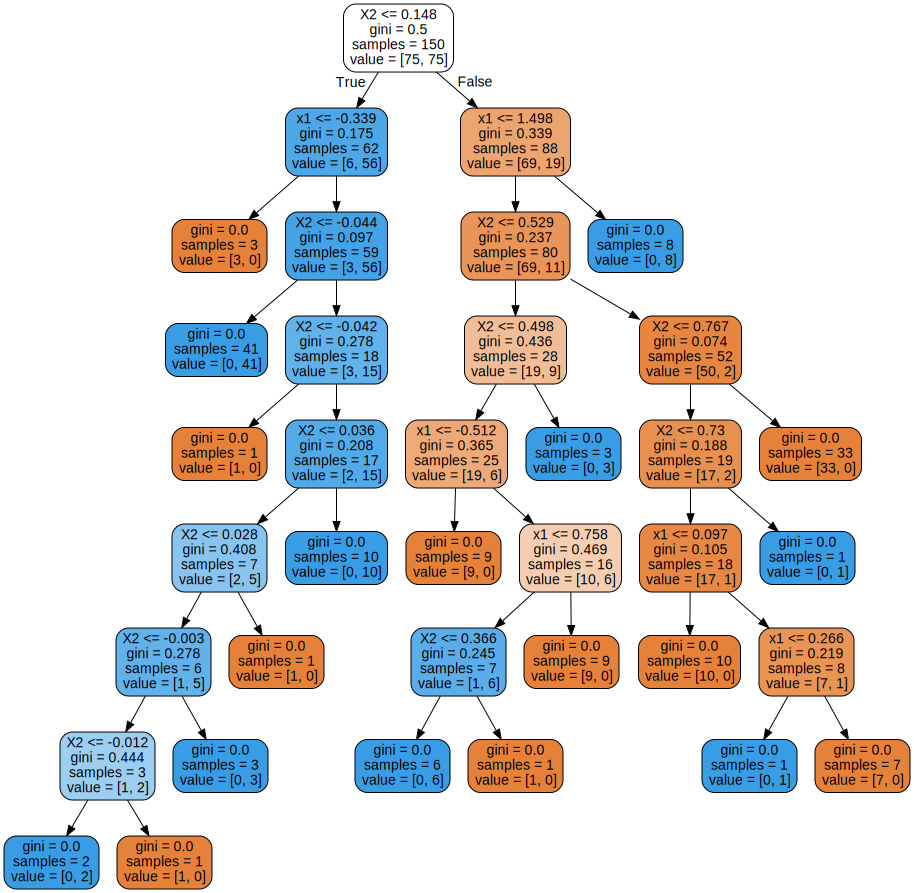

In [72]:
tree = DecisionTreeClassifier(random_state=32)
tree.fit(X, y)
export_graphviz(
    tree,
    out_file='tree_withoutR.dot',
    feature_names=["x1", 'X2'],
    rounded=True,
    filled=True
)
Source.from_file('tree_withoutR.dot')

we can notice overfitting clear here.


let's use pruning technique:


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

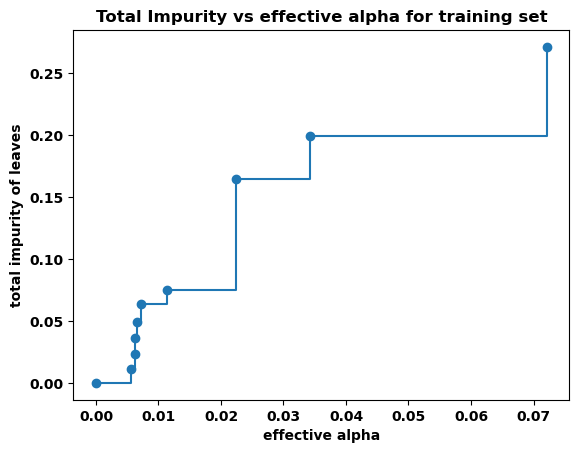

In [73]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [75]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2291055718475073


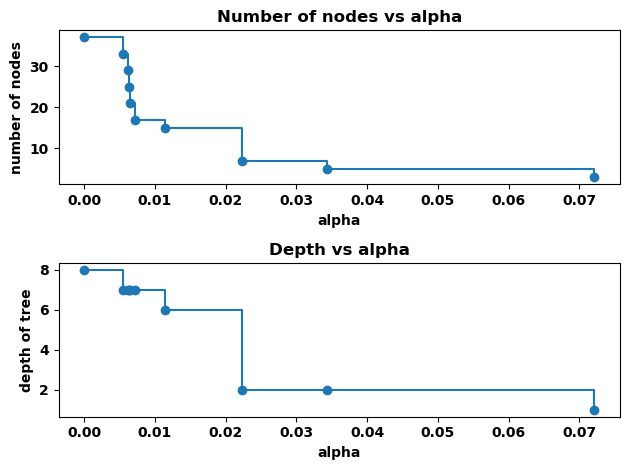

In [76]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

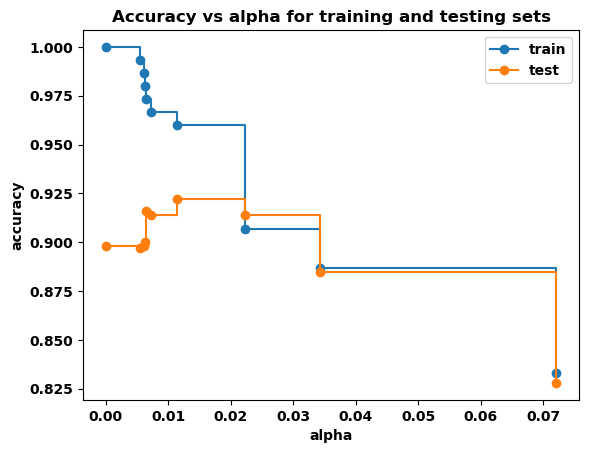

In [77]:
train_scores = [clf.score(X, y) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o",
        label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o",
        label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Regression


In [79]:
from sklearn.tree import DecisionTreeRegressor

X = np.random.rand(200, 1) - .5
y = X**2 + .025*np.random.randn(200, 1)

tree = DecisionTreeRegressor(max_depth=2, random_state=32)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=32)

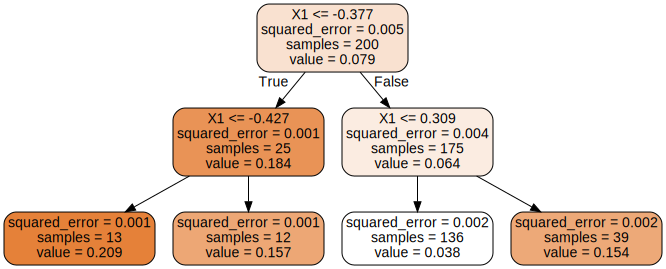

In [81]:
export_graphviz(
    tree,
    out_file='regression_tree.dot',
    feature_names=['X1'],
    filled=True,
    rounded=True
)
Source.from_file('regression_tree.dot')

- Value is the avg value within current group of samples.
- Splitting is done on Squared Error rather that gini-impurity